**Setting up Google Colab.**

In [0]:
import tensorflow as tf 
device_name = tf.test.gpu_device_name() 
if device_name != '/device:GPU:0': raise SystemError('GPU device not found') 
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Coping file to Google Colab from Drive (Not necessary)
# !cp '/content/drive/My Drive/Colab Notebooks/Internships/Image Classification of Clothes/dataset.zip' dataset.zip

# Uncompressing the dataset directly from Drive.
!unzip -qq '/content/drive/My Drive/Colab Notebooks/Internships/Image Classification of Clothes/dataset.zip'

replace dataset/test_set/34_sleeve/full_0_1901000064.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [0]:
!ls

dataset  drive	sample_data


In [0]:
# To remove the dataset.zip file
# !rm dataset.zip
# !ls

**Image Classification**

In [0]:
# Making necessary imports
from tensorflow import keras

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [0]:
# Making the first model. 
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
__________

In [0]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['acc'])

In [0]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [71]:
train_set = train_datagen.flow_from_directory('dataset/train_set', 
                                              batch_size=32, 
                                              target_size=(50,50),
                                              class_mode='categorical')

Found 1617 images belonging to 13 classes.


In [72]:
test_set = test_datagen.flow_from_directory('dataset/test_set', 
                                              batch_size=32, 
                                              target_size=(50,50),
                                              class_mode='categorical')

Found 390 images belonging to 13 classes.


In [73]:
history = model.fit_generator(train_set, steps_per_epoch=51, 
                              epochs=100, validation_data=test_set,
                              validation_steps=13)

Epoch 1/100
51/51 [==============================] - 13s 258ms/step - loss: 2.5719 - acc: 0.0594 - val_loss: 2.5622 - val_acc: 0.1077
Epoch 2/100
51/51 [==============================] - 13s 259ms/step - loss: 2.5603 - acc: 0.0899 - val_loss: 2.5849 - val_acc: 0.0872
Epoch 3/100
51/51 [==============================] - 13s 262ms/step - loss: 2.5469 - acc: 0.1003 - val_loss: 2.5522 - val_acc: 0.0821
Epoch 4/100
51/51 [==============================] - 13s 261ms/step - loss: 2.5375 - acc: 0.1023 - val_loss: 2.5391 - val_acc: 0.1179
Epoch 5/100
51/51 [==============================] - 13s 261ms/step - loss: 2.5218 - acc: 0.1163 - val_loss: 2.5437 - val_acc: 0.1205
Epoch 6/100
51/51 [==============================] - 13s 261ms/step - loss: 2.5062 - acc: 0.1222 - val_loss: 2.5528 - val_acc: 0.1000
Epoch 7/100
51/51 [==============================] - 13s 262ms/step - loss: 2.5115 - acc: 0.1259 - val_loss: 2.5437 - val_acc: 0.1205
Epoch 8/100
51/51 [==============================] - 13s 259ms

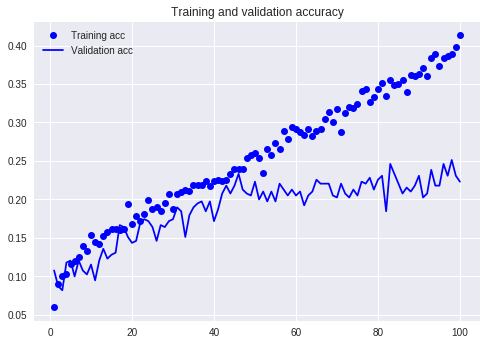

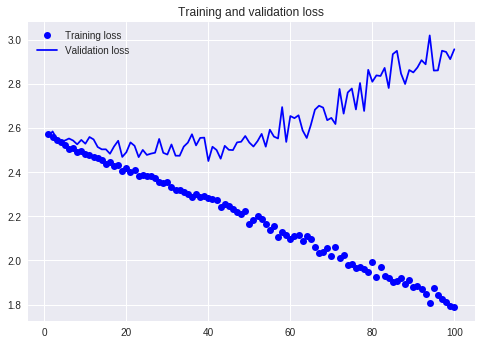

In [74]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Rebuilding the Model
# Adding 1 more Convolutional layer.
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 2, 2, 128)         147584    
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['acc'])

In [87]:
history = model.fit_generator(train_set, steps_per_epoch=51, 
                              epochs=100, validation_data=test_set,
                              validation_steps=13)

Epoch 1/100
51/51 [==============================] - 14s 274ms/step - loss: 2.5682 - acc: 0.0741 - val_loss: 2.5640 - val_acc: 0.0872
Epoch 2/100
51/51 [==============================] - 13s 258ms/step - loss: 2.5656 - acc: 0.0705 - val_loss: 2.5658 - val_acc: 0.0692
Epoch 3/100
51/51 [==============================] - 13s 260ms/step - loss: 2.5601 - acc: 0.0839 - val_loss: 2.5594 - val_acc: 0.0872
Epoch 4/100
51/51 [==============================] - 13s 253ms/step - loss: 2.5617 - acc: 0.0967 - val_loss: 2.5605 - val_acc: 0.0744
Epoch 5/100
51/51 [==============================] - 13s 256ms/step - loss: 2.5549 - acc: 0.0924 - val_loss: 2.5462 - val_acc: 0.0872
Epoch 6/100
51/51 [==============================] - 13s 256ms/step - loss: 2.5474 - acc: 0.1052 - val_loss: 2.5566 - val_acc: 0.0897
Epoch 7/100
51/51 [==============================] - 13s 254ms/step - loss: 2.5393 - acc: 0.0980 - val_loss: 2.5556 - val_acc: 0.0615
Epoch 8/100
51/51 [==============================] - 13s 251ms

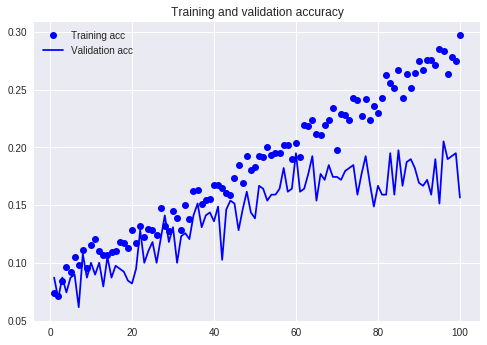

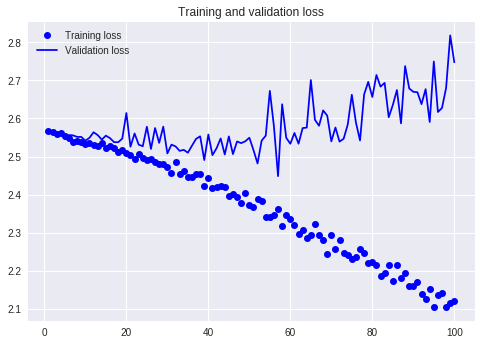

In [88]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
# Adding more layers is reducing the accuracy, so 3 convolution layers are enough.
# Changing the input shape.
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 36992)             0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['acc'])

In [92]:
train_set = train_datagen.flow_from_directory('dataset/train_set', 
                                              batch_size=32, 
                                              target_size=(150,150),
                                              class_mode='categorical')

Found 1617 images belonging to 13 classes.


In [93]:
test_set = test_datagen.flow_from_directory('dataset/test_set', 
                                              batch_size=32, 
                                              target_size=(150,150),
                                              class_mode='categorical')

Found 390 images belonging to 13 classes.


In [94]:
history = model.fit_generator(train_set, steps_per_epoch=51, 
                              epochs=100, validation_data=test_set,
                              validation_steps=13)

Epoch 1/100
51/51 [==============================] - 22s 429ms/step - loss: 2.5824 - acc: 0.0771 - val_loss: 2.5641 - val_acc: 0.0821
Epoch 2/100
51/51 [==============================] - 20s 400ms/step - loss: 2.5624 - acc: 0.0751 - val_loss: 2.5550 - val_acc: 0.0923
Epoch 3/100
51/51 [==============================] - 21s 407ms/step - loss: 2.5585 - acc: 0.0972 - val_loss: 2.5598 - val_acc: 0.0974
Epoch 4/100
51/51 [==============================] - 21s 403ms/step - loss: 2.5461 - acc: 0.1082 - val_loss: 2.5565 - val_acc: 0.1077
Epoch 5/100
51/51 [==============================] - 21s 405ms/step - loss: 2.5362 - acc: 0.1090 - val_loss: 2.5417 - val_acc: 0.0974
Epoch 6/100
51/51 [==============================] - 20s 397ms/step - loss: 2.5329 - acc: 0.1146 - val_loss: 2.5398 - val_acc: 0.0872
Epoch 7/100
51/51 [==============================] - 20s 395ms/step - loss: 2.5227 - acc: 0.1193 - val_loss: 2.5349 - val_acc: 0.0897
Epoch 8/100
51/51 [==============================] - 21s 407ms

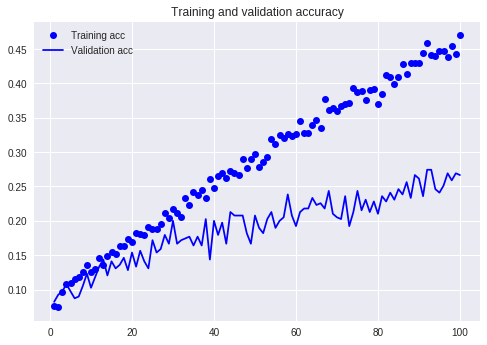

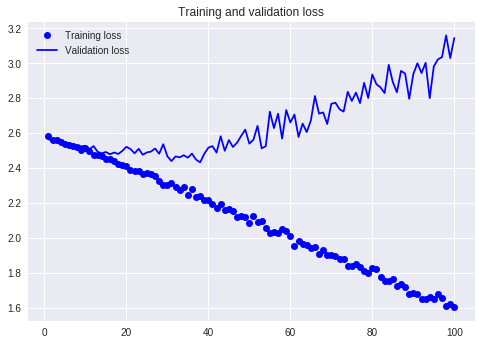

In [95]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()